In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [2]:
DF = pd.read_csv('creditcard.csv')

In [3]:
print(DF.shape)

(284807, 31)


In [4]:
print('Number of Columns in the dataset: {}.' .format(DF.shape[1]))

Number of Columns in the dataset: 31.


In [5]:
print('Number of Rows in the dataset: {}.' .format(DF.shape[0]))

Number of Rows in the dataset: 284807.


In [6]:
DF.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
#peek at the data
DF.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
139802,83364.0,-1.337994,0.402066,1.924953,-0.595584,0.612066,1.561879,0.077044,0.830653,0.132834,...,0.085065,0.494724,-0.229668,-0.804455,0.187885,0.575114,0.170627,0.089216,14.96,0
131800,79738.0,1.294361,-0.531561,0.359610,-1.132884,-0.639692,0.210646,-0.794682,0.273565,1.854705,...,-0.061482,-0.022642,-0.192401,-0.981172,0.597726,-0.619025,0.079320,0.009059,1.00,0
163642,116116.0,-1.576717,1.002380,-0.718178,-0.859156,1.961424,0.757496,1.255994,-0.561535,1.167414,...,0.154074,1.406707,-0.124421,-1.721335,-0.596560,-0.178303,-0.703454,-0.083540,12.70,0
221117,142443.0,2.290768,-0.553228,-2.815958,-1.172789,0.641815,-1.044542,0.401970,-0.513079,-1.235266,...,0.472563,1.382877,-0.382608,-0.934372,0.861464,0.342163,-0.104452,-0.110497,30.00,0
270831,164279.0,1.674310,-0.485057,-1.811893,0.494318,0.170641,-0.608946,0.296039,-0.125059,0.260897,...,-0.197200,-0.924435,0.198221,0.668019,-0.392162,0.124905,-0.102554,-0.008554,179.99,0
7717,10736.0,-0.428044,1.228053,1.886092,0.706977,0.002512,-0.972700,0.612398,-0.229953,0.508776,...,-0.324296,-0.711517,-0.020452,0.621907,-0.318361,0.113538,0.048438,0.118285,4.49,0
144871,86449.0,-1.592814,1.872049,-0.405714,-0.479451,0.938264,-1.344801,1.848236,-1.798108,1.598937,...,0.291890,1.275999,-0.218666,0.350975,-0.565388,-0.470404,-2.288880,-0.395246,11.03,0
34266,37588.0,1.041649,-0.702647,0.814294,-0.894978,-0.926803,0.419434,-0.859269,0.446808,1.725853,...,0.105369,0.444002,-0.007996,-0.305622,0.268564,-0.644331,0.108270,0.022356,39.20,0
228228,145410.0,1.986640,-0.519737,-0.360710,0.050590,-0.676753,-0.183927,-0.759933,0.100839,1.301652,...,0.204367,0.824099,0.092351,-0.295894,-0.159095,0.126710,0.012537,-0.056772,1.00,0
220129,142036.0,-1.147755,1.659616,-1.812272,-1.195308,0.861797,-1.532363,1.182983,0.187634,-0.147395,...,0.169071,0.752136,-0.191805,-0.609876,-0.080400,0.115218,0.197717,0.023737,7.70,0


In [8]:
#generate a descriptive statistics
DF.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
#understanding the summary of the data: this includes list of all columns with their data types and non-null values in each column
type(DF)

pandas.core.frame.DataFrame

In [10]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [11]:
print(DF.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [12]:
#summary statistics of the predictive features alone
DF.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


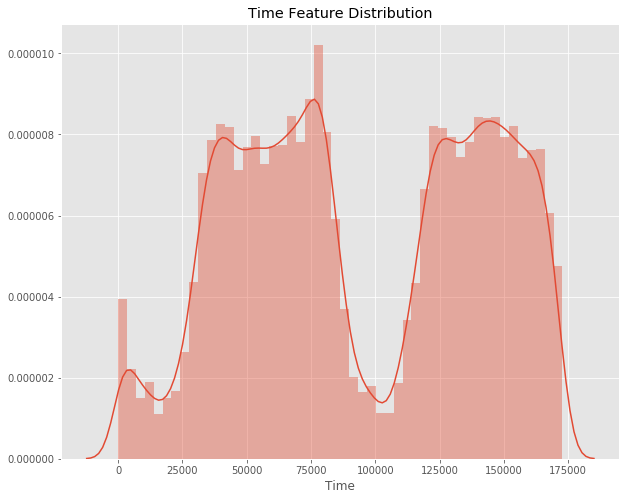

In [13]:
#visualization of the predictiong features
plt.figure(figsize=(10,8))
plt.title('Time Feature Distribution')
sns.distplot(DF.Time)

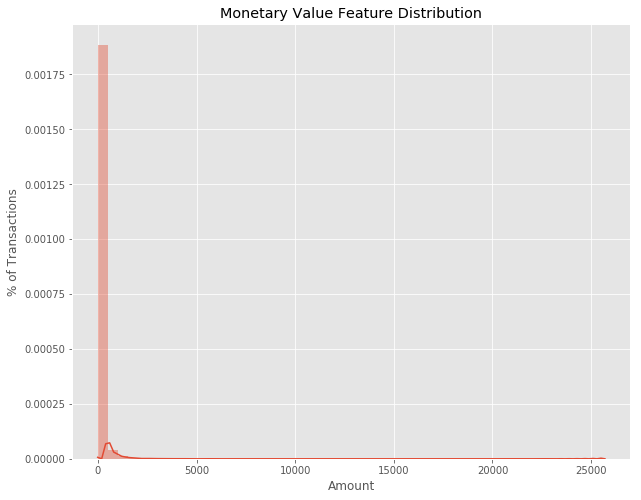

In [14]:
#visualization of the predictiong features
plt.figure(figsize=(10,8))
plt.title('Monetary Value Feature Distribution')
plt.ylabel('% of Transactions')
sns.distplot(DF.Amount)

In [15]:
#getting the number of fradulent and non-fradulent transactions
counts = DF.Class.value_counts()
#counts
non_fraudulent = counts[0]
fraudulent =counts[1]

#Get the percentage of fraudulent and non-fraudulent transaction
non_fraudulent_perc = (non_fraudulent/(non_fraudulent + fraudulent)) *100
fraudulent_perc =  (fraudulent/(non_fraudulent + fraudulent)) *100

print(non_fraudulent)
print(fraudulent)
print('There were', '{:.3f}%'.format(non_fraudulent_perc), 'non-fraudulent transactions')
print('There were', '{:.3f}%'.format(fraudulent_perc), 'fraudulent transactions')


284315
492
There were 99.827% non-fraudulent transactions
There were 0.173% fraudulent transactions


Text(0.5, 0, 'Class (0:Non-Fraudulent Transaction, 1:Fraudulent Transaction)')

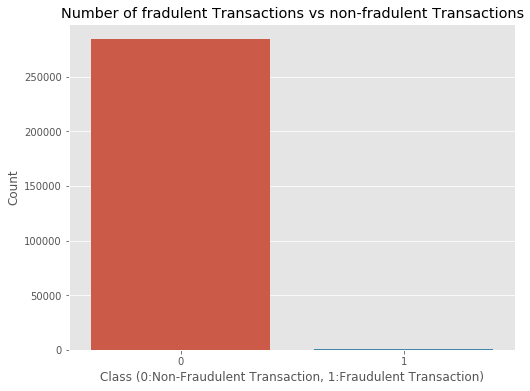

In [17]:
#Visualize fradulent and non fraudulent transaction
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y = counts)
plt.title('Number of fradulent Transactions vs non-fradulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent Transaction, 1:Fraudulent Transaction)')

In [18]:
#checking for significant correlation between predictors and class variable
corr = DF.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


Text(0.5, 1.0, 'Heatmap Correlation Visualization')

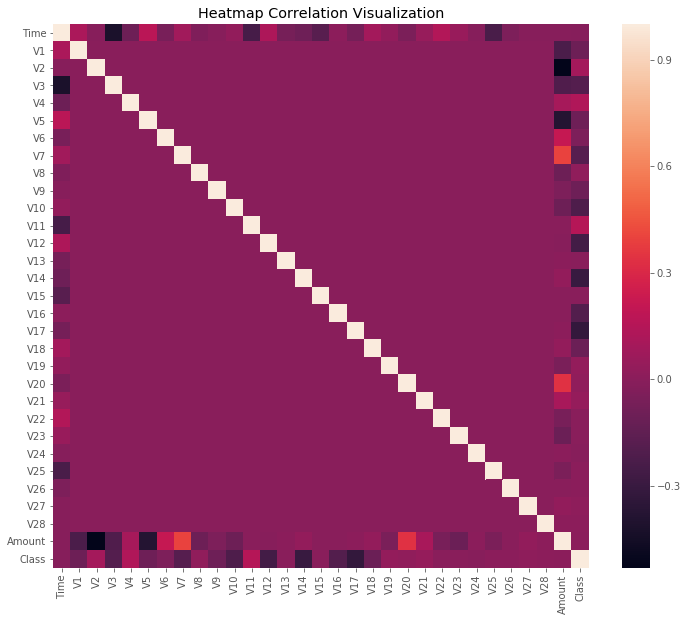

In [19]:
#visualizing correlation with heatmap
corr = DF.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)
plt.title('Heatmap Correlation Visualization')

In [20]:
#Data Preprocessing
# since most of the features are scaled, it will be nice to also scale the predictor(non-anonymized features)
from sklearn.preprocessing import StandardScaler, RobustScaler
rob_scaler = RobustScaler()
std_saler = StandardScaler()

DF['scaled_amount'] = rob_scaler.fit_transform(DF['Amount'].values.reshape(-1, 1))
DF['scaled_time'] = rob_scaler.fit_transform(DF['Time'].values.reshape(-1, 1))


DF.drop([ 'Amount','Time'], axis = 1, inplace = True)
 

In [21]:
scaled_amount = DF['scaled_amount']
scaled_time = DF['scaled_time']

DF.drop(['scaled_amount', 'scaled_time'], axis = 1, inplace = True)
DF.insert(0, 'scaled_amount', scaled_amount)
DF.insert(1, 'scaled_time', scaled_time)


In [22]:
DF.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [23]:
#Splitting Original Dataset for model testing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('num_of_non_fraud_transactions', round(DF['Class'].value_counts()[0]/len(DF) *100,2), '% of the dataset')
print('num_fraud_transactions', round(DF['Class'].value_counts()[1]/len(DF) *100,2), '% of the dataset')


X = DF.drop('Class', axis = 1)
y = DF['Class']

sss = StratifiedShuffleSplit(n_splits =5, random_state = 42, test_size =0.2)

for train_index, test_index in sss.split(X, y):
    print("Train_set:", train_index, "Test_set:", test_index)
    imbal_X_train, imbal_X_test = X.iloc[train_index], X.iloc[test_index]
    imbal_y_train, imbal_y_test = y.iloc[train_index], y.iloc[test_index]
    
imbal_X_train = imbal_X_train.values
imbal_X_test = imbal_X_test.values
imbal_y_train = imbal_y_train.values
imbal_y_test = imbal_y_test.values

#train_unique_label, train_counts_label = np.unique(imbal_y_train, return_counts = True)
#test_unique_label, test_counts_label = np.unique(imbal_y_test, return_counts = True)


num_of_non_fraud_transactions 99.83 % of the dataset
num_fraud_transactions 0.17 % of the dataset
Train_set: [265518 180305  42664 ...  29062  13766  17677] Test_set: [263020  11378 147283 ... 274532 269819  64170]
Train_set: [ 72227 114282  16818 ... 264471 191914 284017] Test_set: [202638  32978 128121 ... 244024 127667  48318]
Train_set: [ 20895 114622 167683 ... 244502 178972 218506] Test_set: [284352  82483  90981 ... 171224 168807 271602]
Train_set: [122248 181660 194400 ... 104631 277586  29432] Test_set: [225673  63348  68025 ... 279451  77554  76043]
Train_set: [241684 223467 136928 ...  86495 160550  49633] Test_set: [157557 204860  83760 ... 251478 178967 216850]


In [24]:
# Splitting Imbalanced dataset with Random Under-Sampling technique
#randomly selecting 427 non-fraudulent transactions
DF = DF.sample(frac =1)
non_fraud_transaction = DF.loc[DF['Class'] == 0][:492]
fraud_transactions = DF.loc[DF['Class'] == 1]

selected_DF = pd.concat([fraud_transactions, non_fraud_transaction])
sampled_DF = selected_DF.sample(frac = 1, random_state =42)

sampled_DF.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
248600,14.912876,0.814354,0.076369,-4.413245,-2.037587,-0.211303,-1.530600,0.745610,0.420485,-0.133955,...,2.217154,0.453885,-1.113855,-0.577173,0.057545,-0.807282,-0.697142,-0.199388,0.135135,0
42590,-0.233354,-0.511378,-5.932778,4.571743,-9.427247,6.577056,-6.115218,-3.661798,-10.894079,3.709210,...,1.191078,2.014272,-0.167417,0.049968,0.384430,-0.077884,0.565493,1.792012,0.371007,1
211326,-0.084678,0.630564,-0.180605,1.025060,-0.381638,-0.211022,0.899036,-1.378300,1.042682,-0.246330,...,0.098518,0.285699,1.009509,-0.212650,-0.189702,-0.400363,-0.135768,0.466143,0.309500,0
42549,0.925452,-0.511578,-5.314173,4.145944,-8.532522,8.344392,-5.718008,-3.043536,-10.989185,3.404129,...,1.150017,2.331466,0.862996,-0.614453,0.523648,-0.712593,0.324638,2.245091,0.497321,1
42528,4.445050,-0.511684,-4.595617,5.083690,-7.581015,7.546033,-6.949165,-1.729185,-8.190192,2.714670,...,1.682160,2.248971,0.566844,0.033744,0.591783,0.334229,0.386801,2.163898,0.983104,1


Text(0.5, 0, 'Class (0:Non-Fraudulent Transaction, 1:Fraudulent Transaction)')

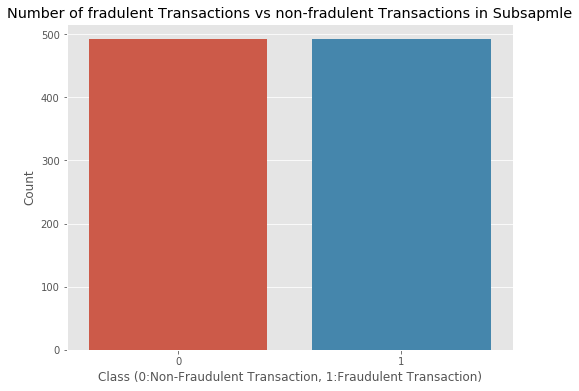

In [27]:
#visualizing subsampled fradulent and non fraudulent transaction)
#print('Subsample Dataset Distribution')
#print(sampled_DF['Class'].value_counts()/len(sampled_DF))

new_counts = sampled_DF.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y = new_counts)
plt.title('Number of fradulent Transactions vs non-fradulent Transactions in Subsapmle')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent Transaction, 1:Fraudulent Transaction)')

In [68]:
#checking for significant correlation between predictors and class variable again
corr = sampled_DF.corr()
corr = corr[['Class']]
corr

,Class
scaled_amount,0.020364
scaled_time,-0.139558
V1,-0.426457
V2,0.499406
V3,-0.566930
V4,0.716608
V5,-0.368011
V6,-0.389002
V7,-0.473064
V8,0.058828


In [69]:
#negative correlation smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.566930
V9,-0.562129
V10,-0.624459
V12,-0.680063
V14,-0.748594
V16,-0.593602
V17,-0.558331


In [70]:
corr[corr.Class > 0.5]

,Class
V4,0.716608
V11,0.691737
Class,1.000000


Text(0.5, 1.0, 'Heatmap Correlation Visualization for Inbalanced Dataset')

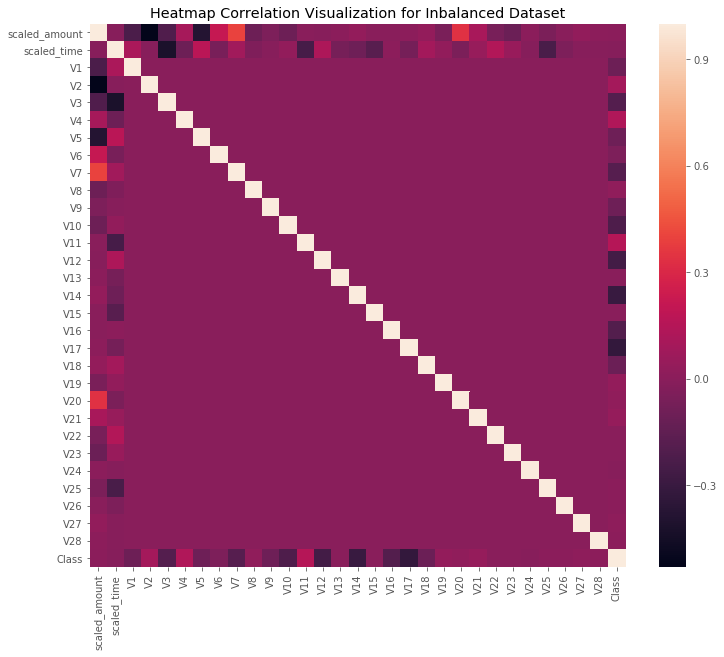

In [71]:
corr = DF.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)
plt.title('Heatmap Correlation Visualization for Inbalanced Dataset')



Text(0.5, 1.0, 'Heatmap Correlation Visualization for balanced Dataset')

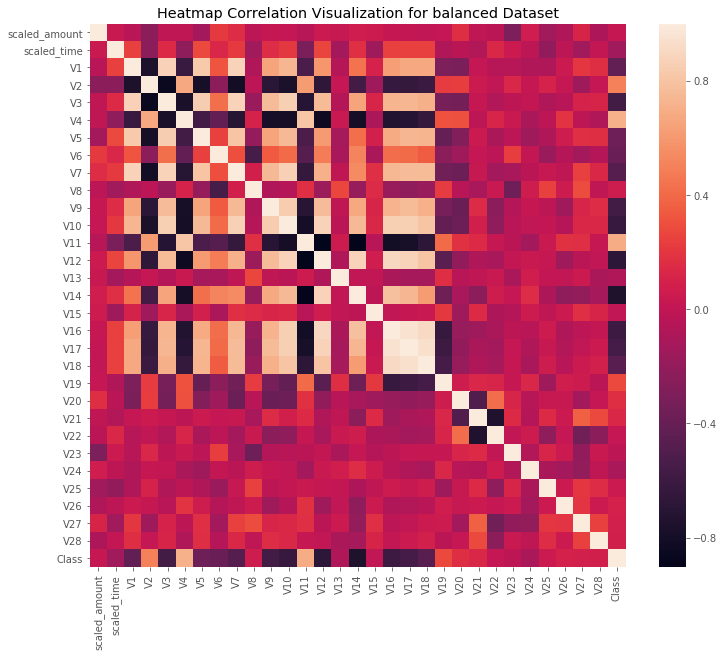

In [73]:
sub_sample_corr = sampled_DF.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(sub_sample_corr, xticklabels = sub_sample_corr.columns, yticklabels = sub_sample_corr.columns)
plt.title('Heatmap Correlation Visualization for balanced Dataset')

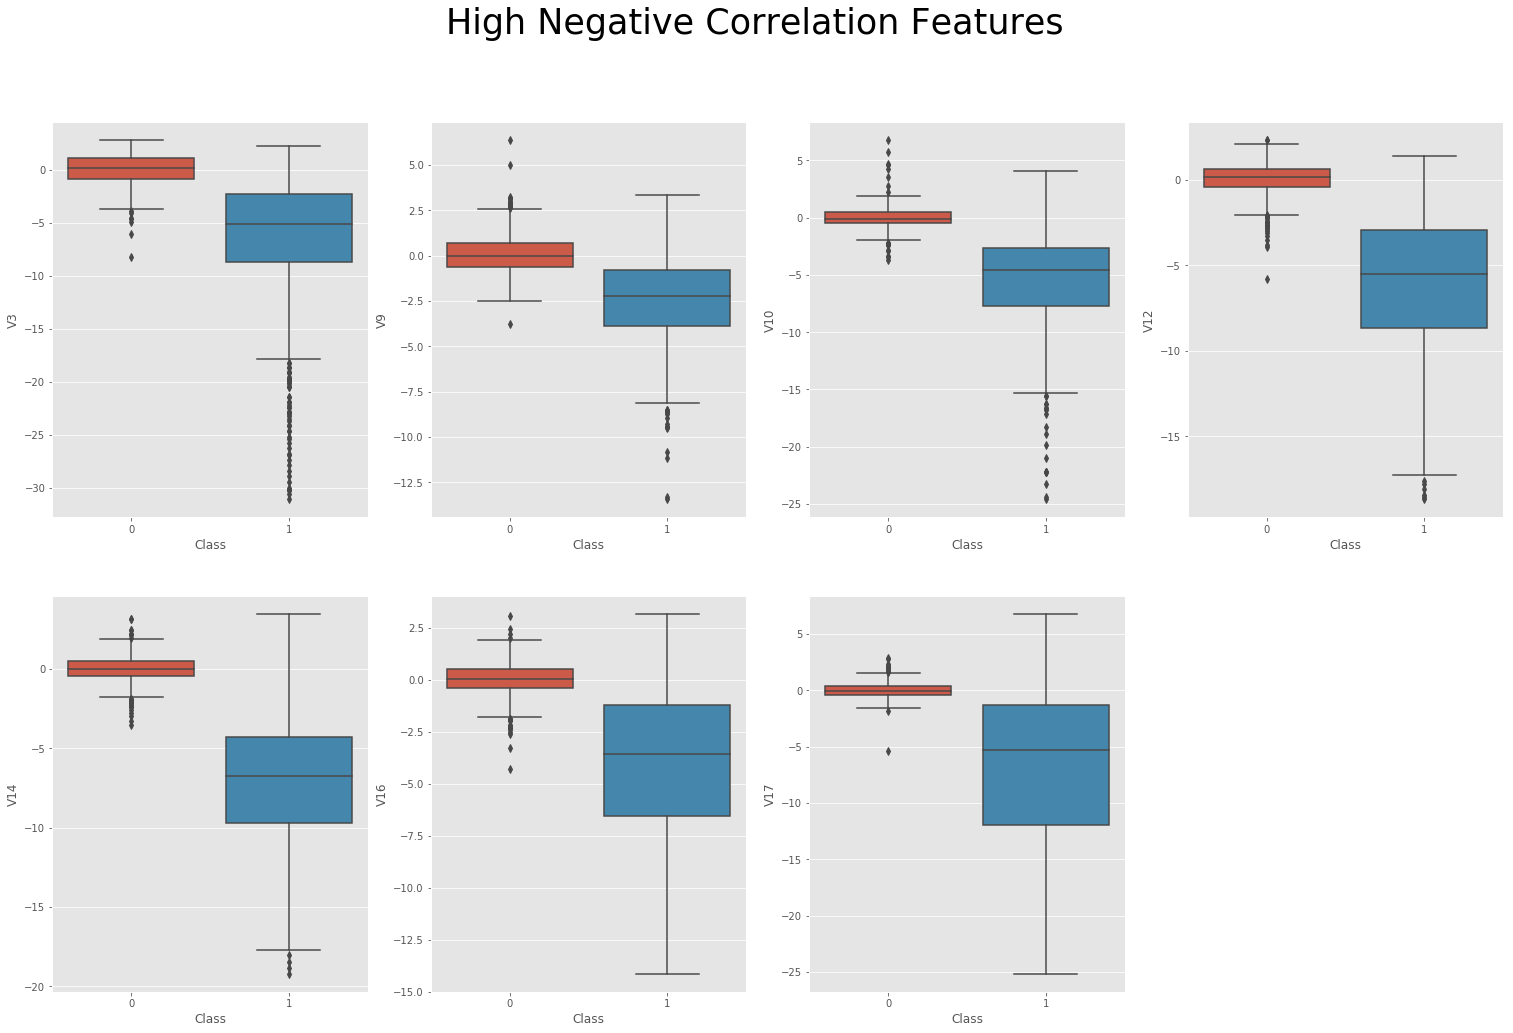

In [74]:
#Visualizing high correlation features with boxplot
f, axes = plt.subplots(nrows = 2, ncols =4, figsize=(26,16))

f.suptitle('High Negative Correlation Features', size = 35)
sns.boxplot(x = "Class", y = "V3", data = sampled_DF, ax=axes[0,0])
sns.boxplot(x = "Class", y = "V9", data = sampled_DF, ax=axes[0,1])
sns.boxplot(x = "Class", y = "V10", data = sampled_DF, ax=axes[0,2])
sns.boxplot(x = "Class", y = "V12", data = sampled_DF, ax=axes[0,3])
sns.boxplot(x = "Class", y = "V14", data = sampled_DF, ax=axes[1,0])
sns.boxplot(x = "Class", y = "V16", data = sampled_DF, ax=axes[1,1])
sns.boxplot(x = "Class", y = "V17", data = sampled_DF, ax=axes[1,2])
f.delaxes(axes[1,3])

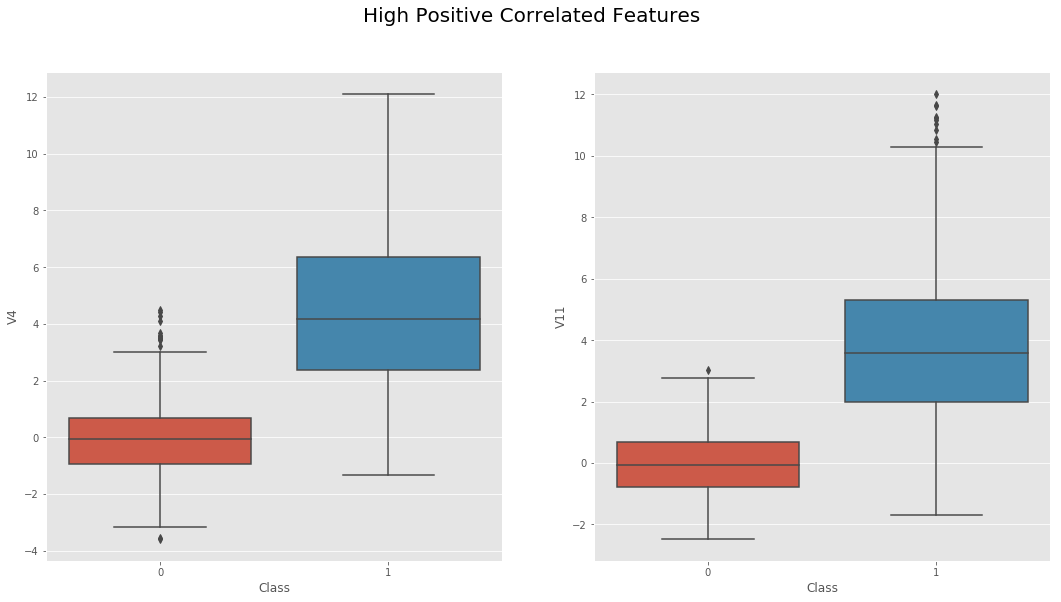

In [75]:
f, axes = plt.subplots(nrows = 1, ncols =2, figsize=(18,9))

f.suptitle('High Positive Correlated Features', size = 20)
sns.boxplot(x = "Class", y = "V4", data = sampled_DF, ax=axes[0])
sns.boxplot(x = "Class", y = "V11", data = sampled_DF, ax=axes[1])

In [79]:
#removing extreme outliers
Q1 = sampled_DF.quantile(0.25)
Q3 = sampled_DF.quantile(0.75)
IQR = Q3 - Q1

DF2 = sampled_DF[~((sampled_DF < (Q1 - 2.5 *IQR)) | (sampled_DF > (Q3 + 2.5 * IQR))). any(axis =1)]
#len(DF2)
#len(sampled_DF)
len(sampled_DF) - len(DF2)

291

In [80]:
#Dimennsionality Reduction
from sklearn.decomposition import PCA
X = DF2.drop('Class', axis = 1)
y = DF2['Class']

# T-SNE Implementation
X_reduced_pca = PCA(n_components = 2, random_state = 42).fit_transform(X.values)


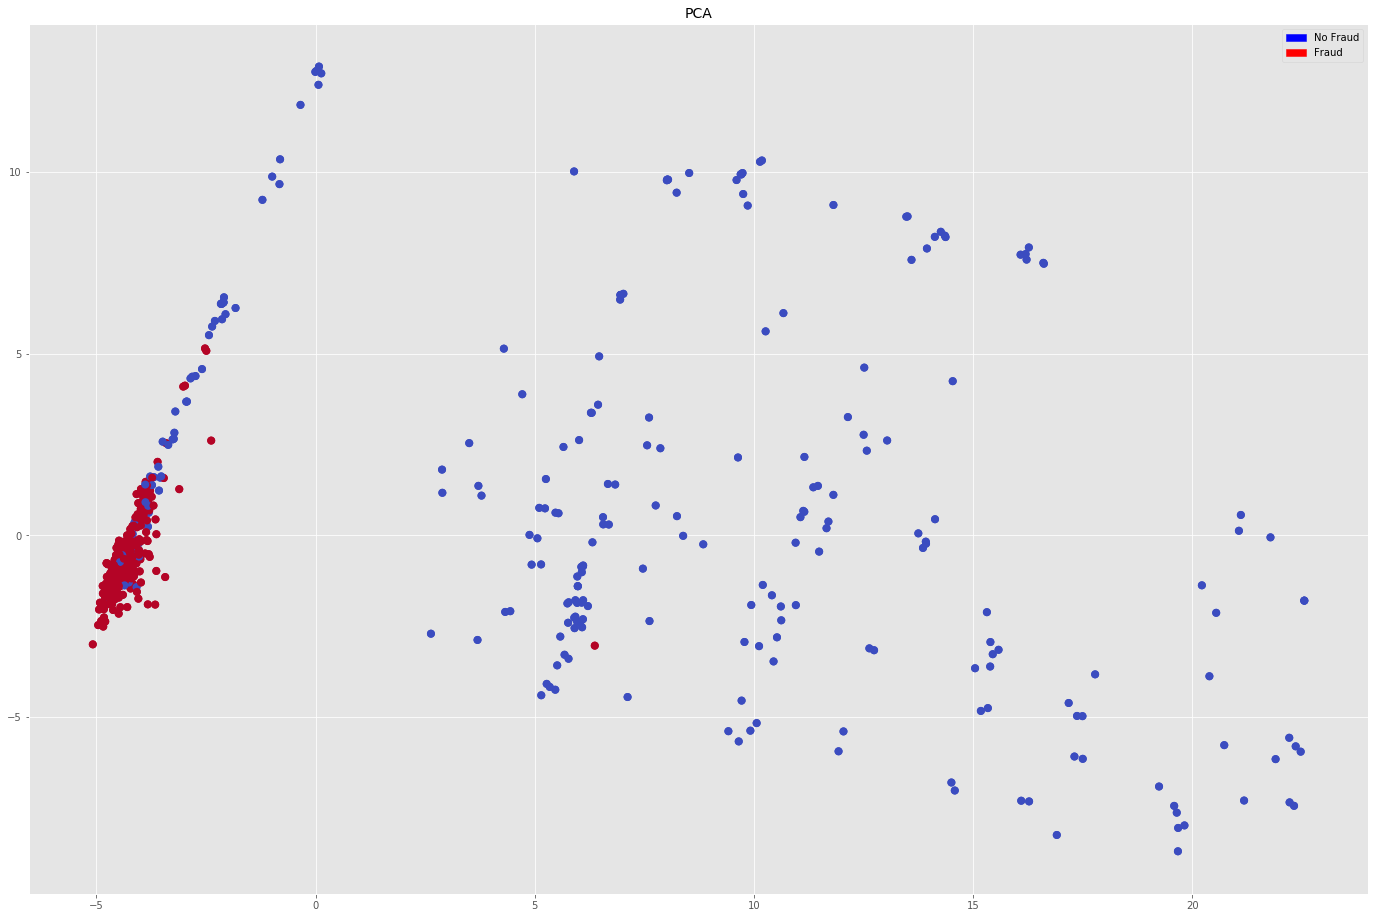

In [81]:
#visualize t-SNE with sctter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize = (24, 16))

blue_patch = mpatches.Patch(color = 'blue', label = 'No Fraud')
red_patch = mpatches.Patch(color = 'red', label = 'Fraud')

ax.scatter(X_reduced_pca[:,0], X_reduced_pca[:, 1], c=(y==0), cmap ='coolwarm', label = 'No Fraud', linewidths =2)
ax.scatter(X_reduced_pca[:,0], X_reduced_pca[:, 1], c=(y==0), cmap ='coolwarm', label = 'Fraud', linewidths =2)

ax.set_title('PCA', fontsize =14)
ax.grid(True)

ax.legend(handles = [blue_patch, red_patch])

In [83]:
#Classification algorithms
from sklearn.model_selection import train_test_split

X = DF2.drop('Class', axis = 1)
y = DF2['Class']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [85]:
#convert values into an array in order to fit them into the classifier
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [87]:
from sklearn.metrics import precision_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [89]:
classifiers = {
    'LogistincRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}

In [111]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv = 10, scoring = 'roc_auc')
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) *100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 98.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 95.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 92.0 % accuracy score
Classifiers:  SVC Has a training score of 97.0 % accuracy score
Classifiers:  GaussianNB Has a training score of 96.0 % accuracy score


In [97]:
#Testing Random Forest model using the 'predict' method
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [101]:
#Predicting the Test set Results
y_pred_RandomForest = model.predict(X_test)

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_RandomForest)
cm

array([[85,  4],
       [ 7, 43]], dtype=int64)